## Previsão de Maus Pagadores

In [3]:
#Importando Pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

%matplotlib inline

In [4]:
#importando dados
df = pd.read_csv(r'C:\Users\Daniel\Downloads\MutualClients.csv')

In [5]:
df.head()

,Unnamed: 0,clientId,shopId,gender,maritalStatus,age,numberOfDependents,education,flagResidencialPhone,areaCodeResidencialPhone,...,professionCode,mateIncome,flagResidencialAddress_PostalAddress,flagOtherCard,quantityBankingAccounts,flagMobilePhone,flagContactPhone,personalNetIncome,codeApplicationBooth,BAD
0,1,2,15,F,S,18,0,NaN,Y,31,...,853,0.0,Y,N,0,N,N,300.0,0,0
1,2,4,12,F,C,47,0,NaN,N,31,...,35,0.0,Y,N,0,N,N,304.0,0,0
2,3,5,16,F,S,28,0,NaN,Y,31,...,24,0.0,Y,N,0,N,N,250.0,0,0
3,4,6,24,M,S,26,0,NaN,N,31,...,999,0.0,Y,N,0,N,N,800.0,0,0
4,5,7,55,F,S,22,0,NaN,Y,31,...,999,0.0,Y,N,0,N,N,410.0,0,0


In [6]:
df.columns

Index(['Unnamed: 0', 'clientId', 'shopId', 'gender', 'maritalStatus', 'age',
       'numberOfDependents', 'education', 'flagResidencialPhone',
       'areaCodeResidencialPhone', 'bestPaymentDay', 'shopRank',
       'residenceType', 'monthsInResidence', 'flagMothersName',
       'flagFathersName', 'flagResidenceTown_WorkingTown',
       'flagResidenceState_WorkingState', 'monthsInTheJob', 'professionCode',
       'mateIncome', 'flagResidencialAddress_PostalAddress', 'flagOtherCard',
       'quantityBankingAccounts', 'flagMobilePhone', 'flagContactPhone',
       'personalNetIncome', 'codeApplicationBooth', 'BAD'],
      dtype='object')

In [7]:
#Observando colunas escondidas
df[['bestPaymentDay', 'shopRank',
       'residenceType', 'monthsInResidence', 'flagMothersName',
       'flagFathersName', 'flagResidenceTown_WorkingTown',
       'flagResidenceState_WorkingState', 'monthsInTheJob']].head()

,bestPaymentDay,shopRank,residenceType,monthsInResidence,flagMothersName,flagFathersName,flagResidenceTown_WorkingTown,flagResidenceState_WorkingState,monthsInTheJob
0,20,0,P,216,Y,Y,Y,Y,12
1,25,0,P,180,Y,Y,N,Y,24
2,25,0,O,12,Y,Y,Y,Y,12
3,28,0,P,180,Y,Y,N,Y,0
4,12,0,A,0,Y,Y,Y,Y,48


In [8]:
# Observando valores estranhos de algumas variáveis
unknown =  df[['education','shopRank','quantityBankingAccounts','numberOfDependents']]

for i in unknown:
    print(i,df[i].value_counts())

education Series([], Name: education, dtype: int64)
shopRank 0    39770
3      178
2       52
Name: shopRank, dtype: int64
quantityBankingAccounts 0    40000
Name: quantityBankingAccounts, dtype: int64
numberOfDependents 0    40000
Name: numberOfDependents, dtype: int64


In [9]:
#Criando um novo datrame eliminando variávies dispensáveis ao modelo preditivo
new_df = df.drop(['Unnamed: 0','numberOfDependents','education', 'flagResidencialPhone',
       'areaCodeResidencialPhone','residenceType', 'monthsInResidence', 
        'flagMothersName','flagFathersName', 'flagResidenceTown_WorkingTown',
       'flagResidenceState_WorkingState','professionCode', 'flagResidencialAddress_PostalAddress', 
        'flagOtherCard','quantityBankingAccounts', 'flagMobilePhone', 'flagContactPhone',
        'codeApplicationBooth'], axis = 1)

In [10]:
# Observando as caracteríscticas das variáveis 
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
clientId             40000 non-null int64
shopId               40000 non-null int64
gender               39997 non-null object
maritalStatus        40000 non-null object
age                  40000 non-null int64
bestPaymentDay       40000 non-null int64
shopRank             40000 non-null int64
monthsInTheJob       40000 non-null int64
mateIncome           40000 non-null float64
personalNetIncome    40000 non-null float64
BAD                  40000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 3.4+ MB


In [11]:
# Observando estatísticas básicas das variáveis
new_df.describe()

,clientId,shopId,age,bestPaymentDay,shopRank,monthsInTheJob,mateIncome,personalNetIncome,BAD
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000
mean,24982.227000,20.822950,34.649725,15.313950,0.015950,50.629500,50.993333,9.752711e+03,0.197500
std,14428.531759,14.571913,13.076200,7.159757,0.212124,73.875139,507.159125,4.856335e+05,0.398118
min,2.000000,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,12458.750000,12.000000,23.000000,9.000000,0.000000,12.000000,0.000000,2.700000e+02,0.000000
50%,25058.500000,21.000000,33.000000,12.000000,0.000000,24.000000,0.000000,4.000000e+02,0.000000
75%,37425.250000,24.000000,43.000000,20.000000,0.000000,60.000000,0.000000,7.380000e+02,0.000000
max,50000.000000,96.000000,88.000000,28.000000,3.000000,1176.000000,70000.000000,3.852910e+07,1.000000


In [12]:
#Eliminando Linhas que contenham valores não declarados
new_df.dropna(how='any',inplace = True)

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39997 entries, 0 to 39999
Data columns (total 11 columns):
clientId             39997 non-null int64
shopId               39997 non-null int64
gender               39997 non-null object
maritalStatus        39997 non-null object
age                  39997 non-null int64
bestPaymentDay       39997 non-null int64
shopRank             39997 non-null int64
monthsInTheJob       39997 non-null int64
mateIncome           39997 non-null float64
personalNetIncome    39997 non-null float64
BAD                  39997 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 3.7+ MB


In [14]:
#Verificando linhas duplicadas
sum(new_df.duplicated())

0

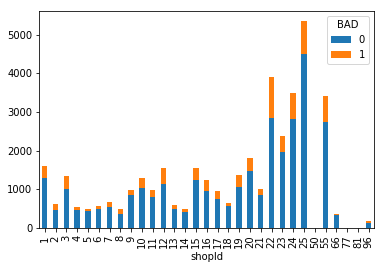

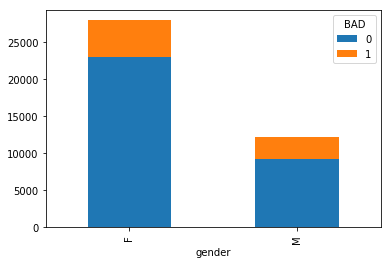

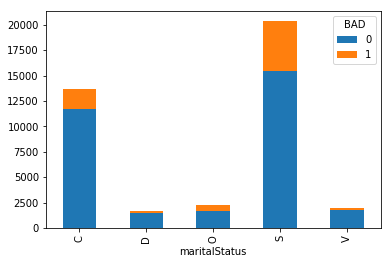

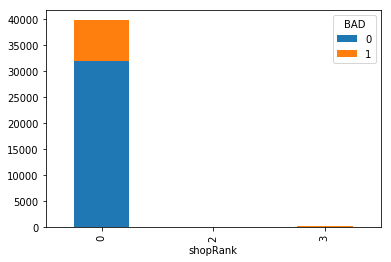

In [15]:
#gráficos de barras para variáveis categóricas, queremos ver as características dos inadimplentes
for i in ['shopId', 'gender', 'maritalStatus', 'shopRank']:
    table = new_df.groupby([i,'BAD'])['BAD'].count().unstack('BAD').fillna(0)
    table.plot(kind = 'bar', stacked = True)
    plt.show()

Observamos que gênero e estado civil nos contam que muheres e solteiros apresentam número e proporções maiores de inadimplência, sendo estas varíaveis possivelmente significativas a nosso modelo. Já as outras variáveis não apresentam características tão claras que representem os inadimplentes.

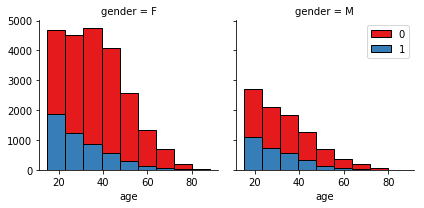

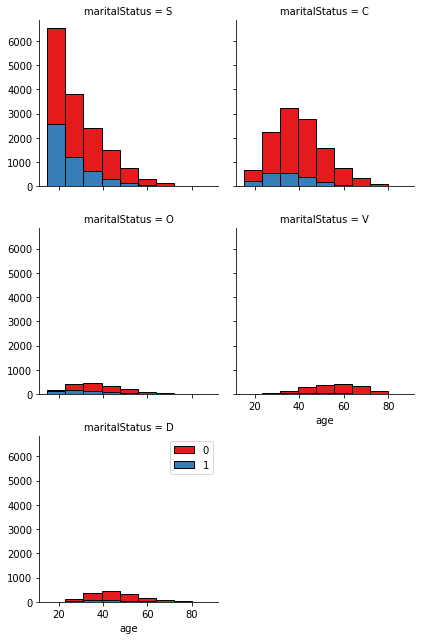

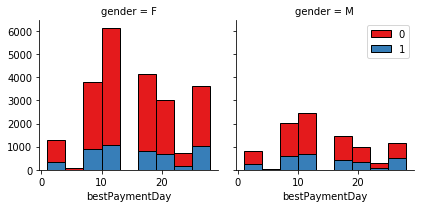

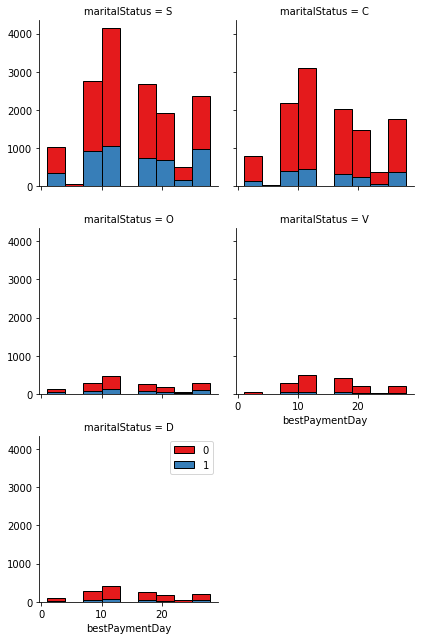

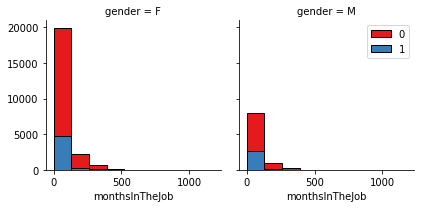

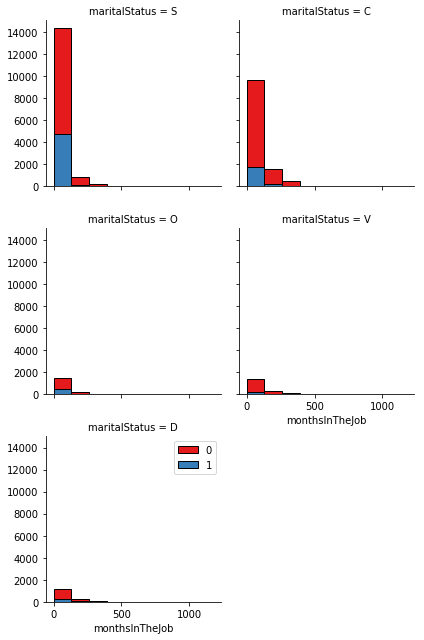

In [16]:
#histograma de variáveis contínuas em conjunção com variáveis categóricas
import seaborn as sns

for i in ['age','bestPaymentDay','monthsInTheJob']:
    for j in ['gender', 'maritalStatus']:
        bins = np.linspace(new_df[i].min(), new_df[i].max(), 10)
        g = sns.FacetGrid(new_df, col=j, hue="BAD", palette="Set1", col_wrap=2)
        g.map(plt.hist,i, bins=bins, ec="k")

        g.axes[-1].legend()
        plt.show()


Quando a idade é levada em conta, observamos que o estado civil impacta muito na inadimplência, porque enquanto entre os solteiros a inadimplência tende à juventude, nos casados não há tendência de inadimplência com relação à idade. Observamos que a variável que destaca a longevidade do emprego dos indivíduos está muito concentrada numa faixa do histograma, resultado talvez da presença de outliers muito díspares da maioria dos dados.

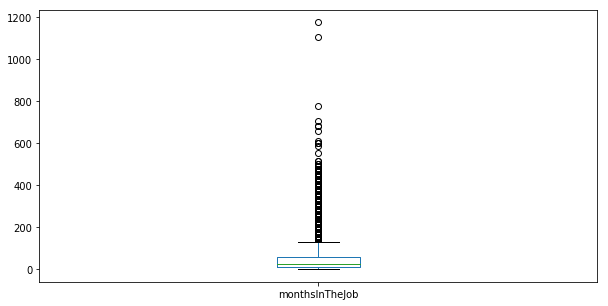

In [34]:
#Observando a presença de outliers
#box plot 'monthsInTheJob'
new_df['monthsInTheJob'].plot(kind = 'box',figsize = (10,5))
plt.show()


In [18]:
#Selecionando uma amostra na qual haja pouco impacto de outliers na análise
sample = new_df.query('monthsInTheJob <100')
sample.head()

,clientId,shopId,gender,maritalStatus,age,bestPaymentDay,shopRank,monthsInTheJob,mateIncome,personalNetIncome,BAD
0,2,15,F,S,18,20,0,12,0.0,300.0,0
1,4,12,F,C,47,25,0,24,0.0,304.0,0
2,5,16,F,S,28,25,0,12,0.0,250.0,0
3,6,24,M,S,26,28,0,0,0.0,800.0,0
4,7,55,F,S,22,12,0,48,0.0,410.0,0


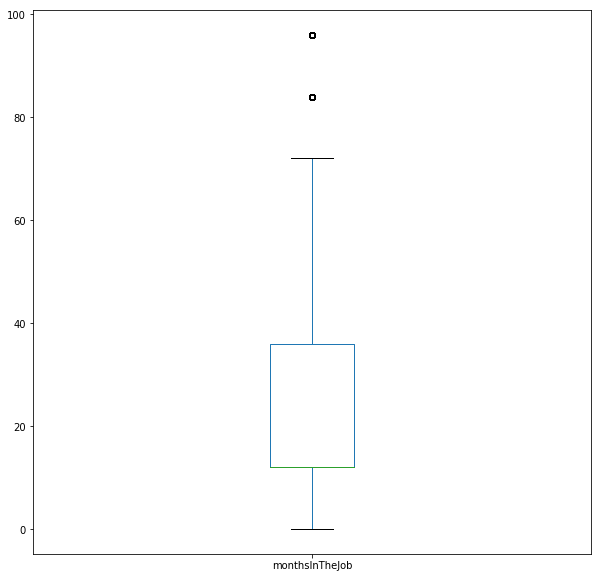

In [19]:
sample['monthsInTheJob'].plot(kind = 'box',figsize = (10,10))
plt.show()


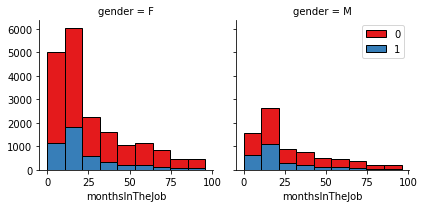

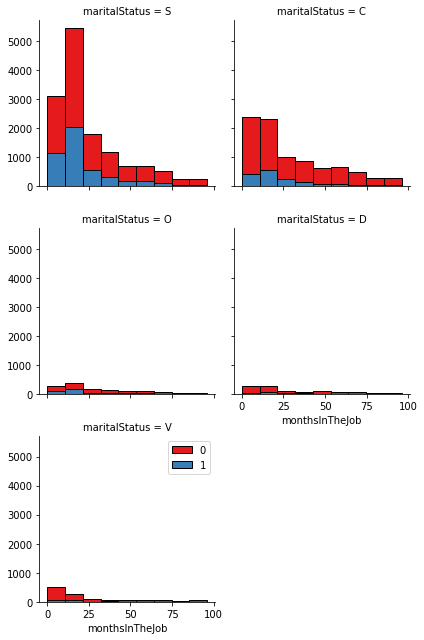

In [20]:
#Histogramas da amostra selecionada
for i in ['monthsInTheJob']:
    for j in ['gender', 'maritalStatus']:
        bins = np.linspace(sample[i].min(), sample[i].max(), 10)
        g = sns.FacetGrid(sample, col=j, hue="BAD", palette="Set1", col_wrap=2)
        g.map(plt.hist,i, bins=bins, ec="k")

        g.axes[-1].legend()
        plt.show()


Observamos que para todos os gêneros e estados civis a maior faixa de inadimplentes costuma ser entre pessoas que já estão em seu segundo ano no mesmo emprego.

In [21]:
#Observando estatísticas sobre renda
new_df[['mateIncome','personalNetIncome']].describe()


,mateIncome,personalNetIncome
count,39997.000000,3.999700e+04
mean,50.997158,9.753399e+03
std,507.177952,4.856517e+05
min,0.000000,0.000000e+00
25%,0.000000,2.700000e+02
50%,0.000000,4.000000e+02
75%,0.000000,7.380000e+02
max,70000.000000,3.852910e+07


Observamos que "mateIcome", que acredito ser a renda do cônjugue, não é uma boa variável a ser selecionada para o nosso modelo, pois até 75% da amostra possui valor zero, por isso suas outras estatísticas não são representativas para o conjunto de dados.

In [22]:
new_df['personalNetIncome'].median()

400.0

In [23]:
new_df['personalNetIncome'].mean()

9753.39945620921

In [24]:
CIS = 738+(738-270)*1.5
CIS

1440.0

In [25]:
#Obtendo amostra contendo dados até o limite superior do box plot 
sample2 = new_df.query('personalNetIncome<1440.0')


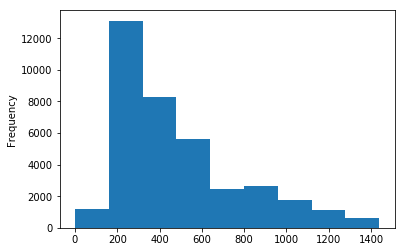

In [26]:
#Observando se o histograma está melhor distribuído
bins = np.linspace(sample2['personalNetIncome'].min(), sample2['personalNetIncome'].max(), 10)
sample2['personalNetIncome'].plot(kind='hist',bins = bins)
plt.show()
    

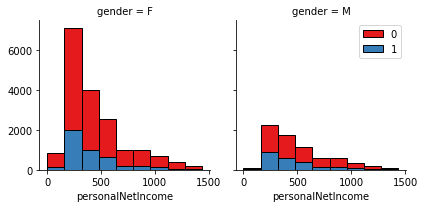

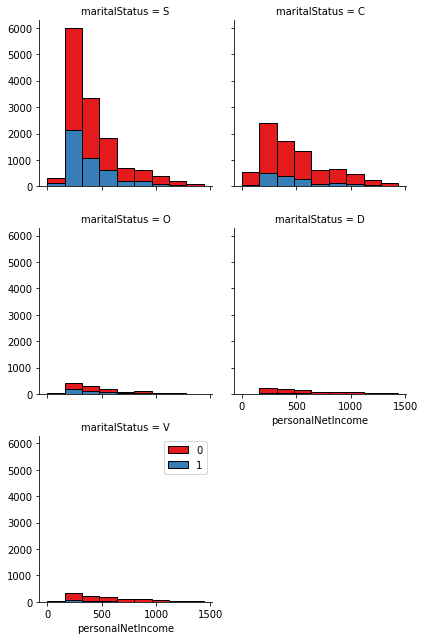

In [27]:
for j in ['gender', 'maritalStatus']:
    g = sns.FacetGrid(sample, col=j, hue="BAD", palette="Set1", col_wrap=2)
    g.map(plt.hist,'personalNetIncome', bins=bins, ec="k")

    g.axes[-1].legend()
    plt.show()


Observamos que independente de gênero e estado civil a faixa de renda onde estão a maior parte dos inadimpentes é entre 200 à 600 unidades monetárias.

Após feita a análise exploratória irei selecionar as variáveis na qual foram mais significantes para mostrar o cmportamento e características dos inadimplentes : 'age','bestPaymentDay','monthsInTheJob','personalNetIncome','gender','maritalStatus'

In [28]:
#tratamento de dados
new_df['gender'].replace(to_replace=['M','F'], value=[0,1],inplace=True)
Feature = new_df[['age','bestPaymentDay','monthsInTheJob','personalNetIncome','gender']]
Feature = pd.concat([Feature,pd.get_dummies(new_df['maritalStatus'])], axis=1)
Feature.head()


,age,bestPaymentDay,monthsInTheJob,personalNetIncome,gender,C,D,O,S,V
0,18,20,12,300.0,1,0,0,0,1,0
1,47,25,24,304.0,1,1,0,0,0,0
2,28,25,12,250.0,1,0,0,0,1,0
3,26,28,0,800.0,0,0,0,0,1,0
4,22,12,48,410.0,1,0,0,0,1,0


In [29]:
#Declarando as variáveis dependentes e independentes do modelo
X = Feature
y = new_df['BAD']

In [30]:
# padronizando os dados
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [31]:
# Dividindo os dados em duas amostras, uma servirá para estimar o modelo e outra para comparar com o resultado da previsão
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (31997, 10) (31997,)
Test set: (8000, 10) (8000,)


Devido a quantidade de outliers e suas distorções significativas nos resultados de modelos lineares, decidi optar pelo modelo k-nearest neighbors para fazer a previsão de mal pagadores, nos permitindo lidar com as características desses indivíduos discrepantes e aproveitando a amostra de forma integral.

In [32]:
#Algoritmo para achar o k que deixa o modelo mais acurado
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
#Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


The best accuracy was with 0.801 with k= 8


In [33]:
#Previsões do modelo dos 100 primeiras individuos na amostra para testes.
neigh = KNeighborsClassifier(n_neighbors = 8).fit(X_train,y_train)
yhat=neigh.predict(X_test)
yhat[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)